<a href="https://colab.research.google.com/github/spqjf12345/NLP-TIL/blob/main/8_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EA%B5%AC%EC%84%B1_%EC%9A%94%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#08-2 CNN 이론
#합성곱 신경망 CNN filter == kernel
#합성곱 계산을 통해 얻은 출력 -> 특성 맵 feature map
#입력의 깊이와 필터의 깊이는 같아야 하기 때문
#필터의 개수 n개라면 특성맵은(x,x,n) 깊이를 가질 것
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides= 1)

#padding, stride
#입력값 주위를 0으로 채운다 -> 계산에 영향 미치지 x 
#same - 0으로 채움, valid - 패딩 사용 x
#이동의 크기 -> 스트라이드 기본 값은 1

#pooling
#합성 곱에서 거의 같이 사용된다.
#만들어진 특성의 가로와 세로를 줄이는 역할 but 차원의 개수는 그대로 유지가 된다.
#pooling을 사용하는 이유는 합성곱에서 스트라이드를 크게 하여 특성 맵을 줄이는 것보다 풀링 층에서 크기 줄이는 것이 더 나은 성능 내기 때문 
keras.layers.MaxPooling2D(2)
#마지막에 특성 맵을 모두 펼쳐 밀집층의 입력 값으로 사용


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

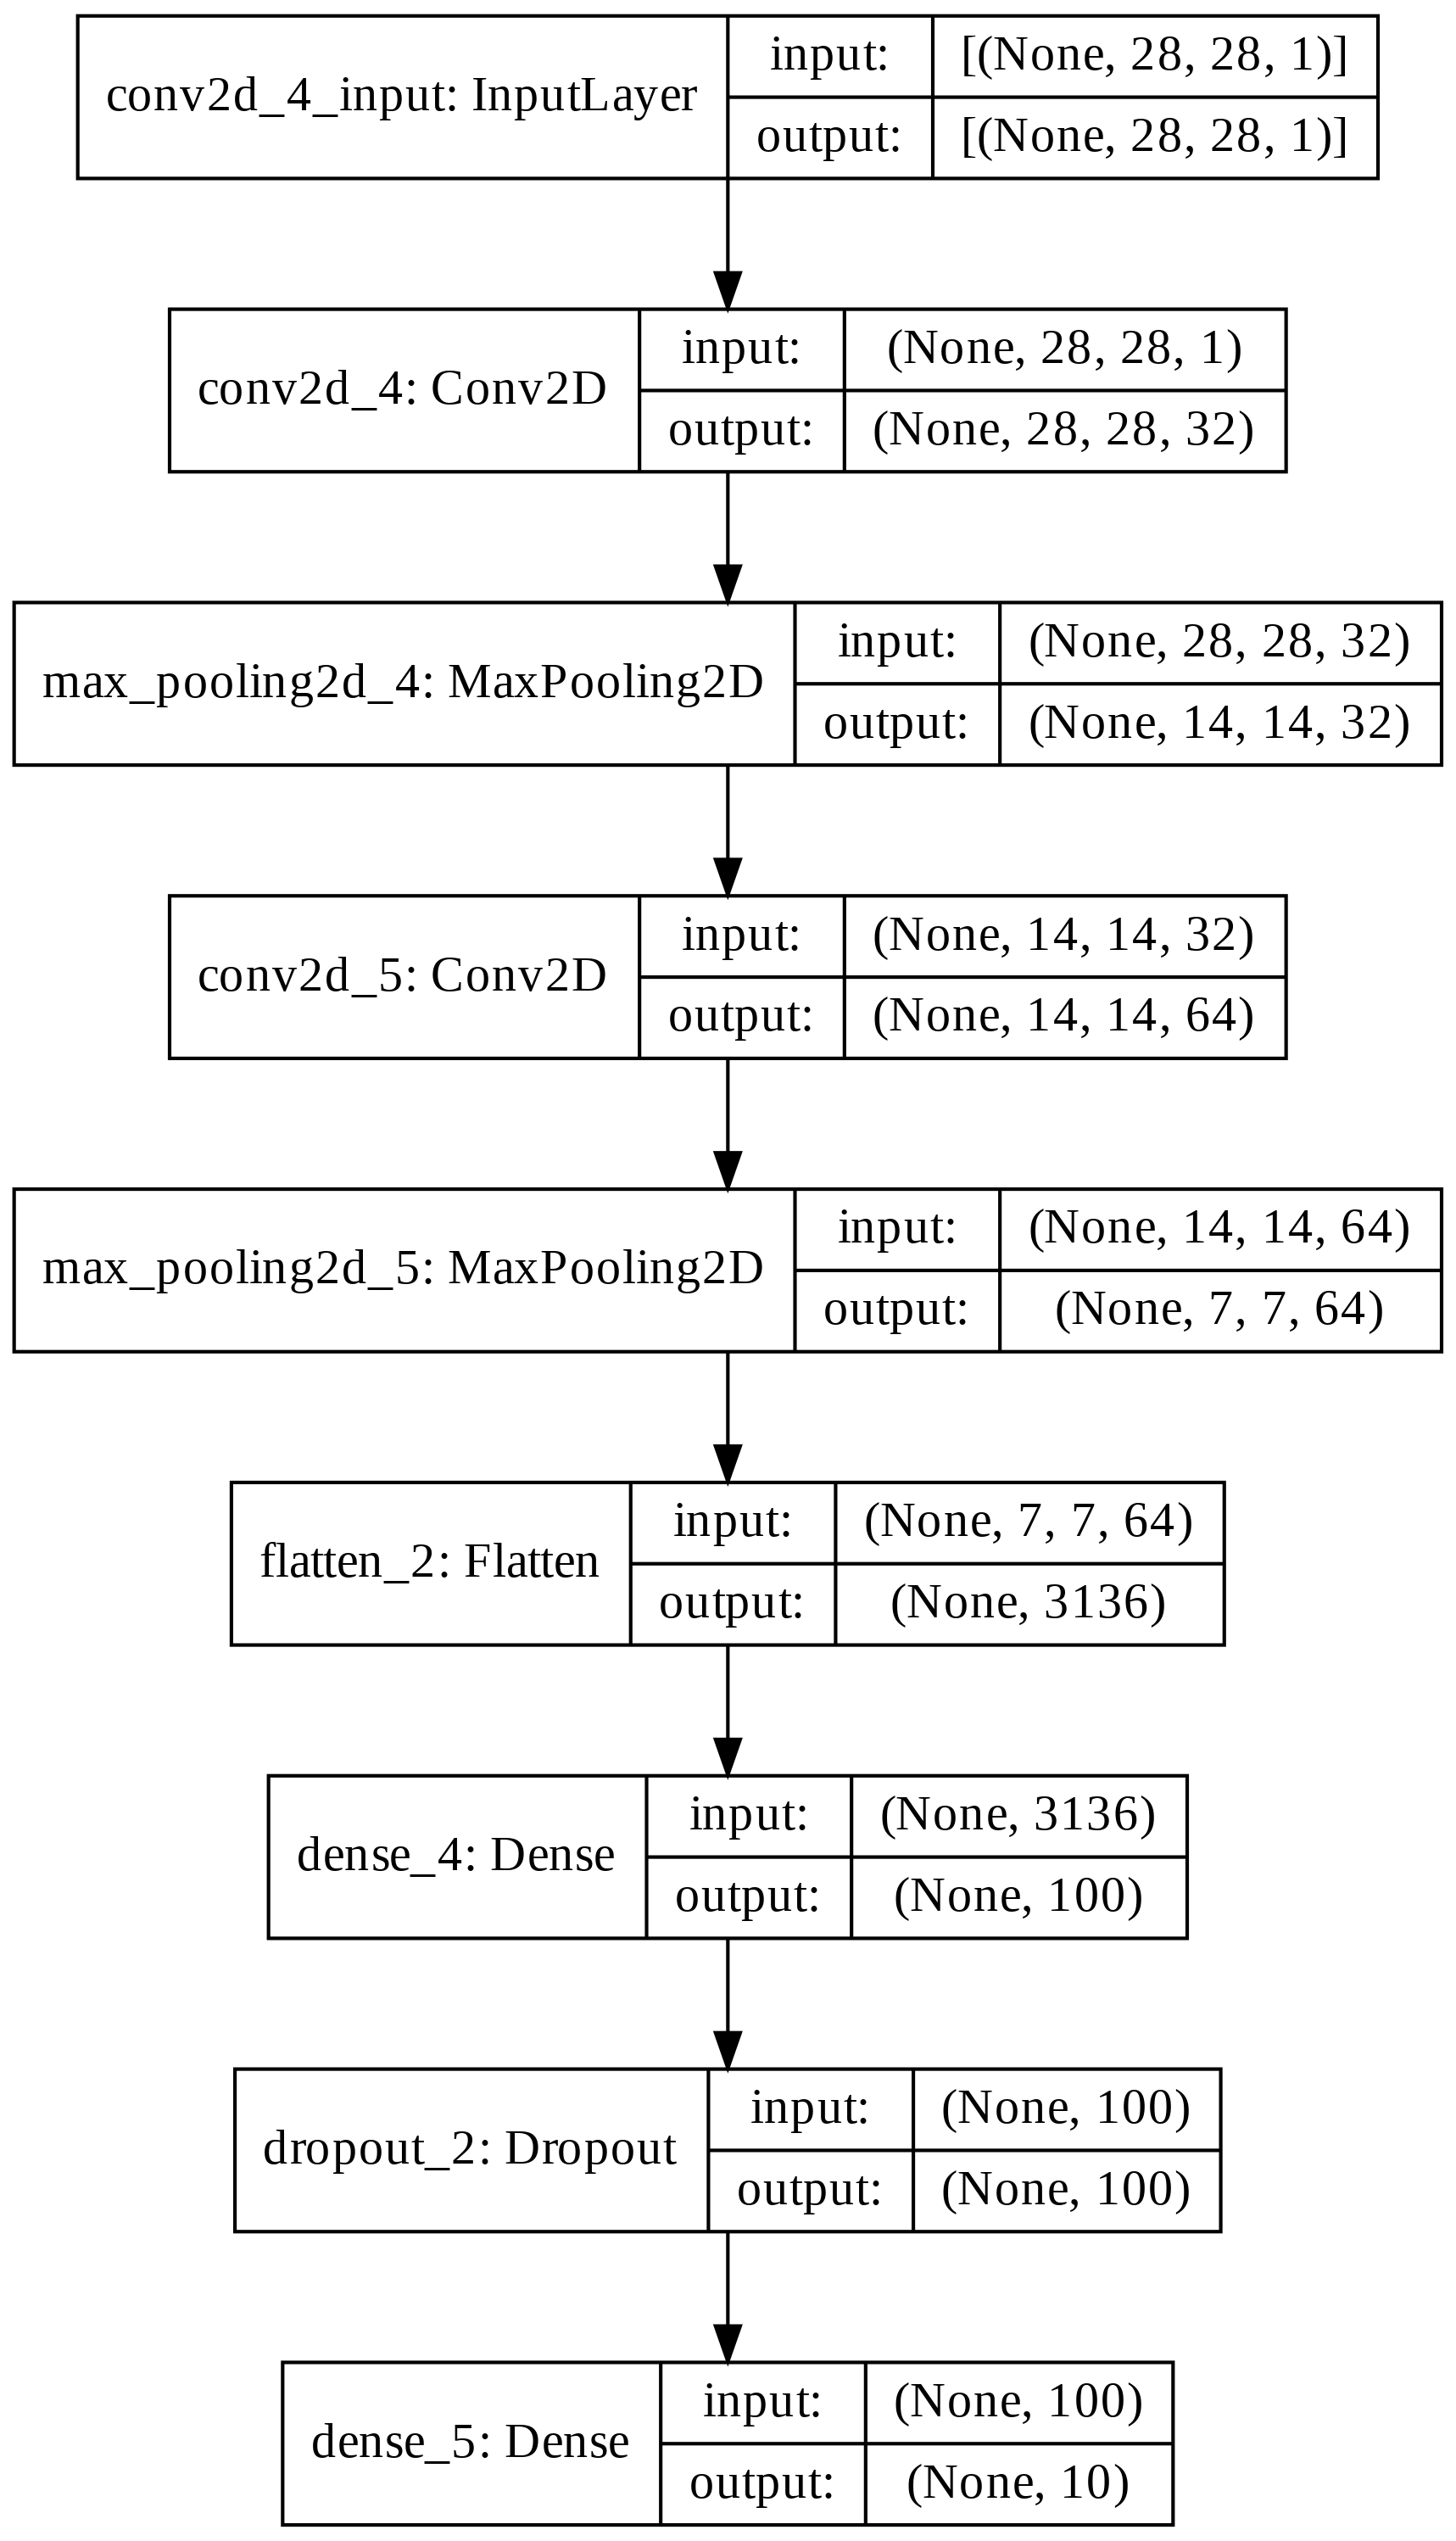

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()

#32개의 필터 
#커널의 크기 (3,3)
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

keras.utils.plot_model(model, show_shapes= True, to_file='cnn-architecture.png', dpi = 300)

In [9]:
#모델 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.4978 - accuracy: 0.8207 - val_loss: 0.3173 - val_accuracy: 0.8849
Epoch 2/20
1500/1500 [==============================] - 54s 36ms/step - loss: 0.3267 - accuracy: 0.8823 - val_loss: 0.2805 - val_accuracy: 0.8964
Epoch 3/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2775 - accuracy: 0.8983 - val_loss: 0.2466 - val_accuracy: 0.9073
Epoch 4/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2471 - accuracy: 0.9095 - val_loss: 0.2354 - val_accuracy: 0.9141
Epoch 5/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2236 - accuracy: 0.9176 - val_loss: 0.2315 - val_accuracy: 0.9158
Epoch 6/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2054 - accuracy: 0.9240 - val_loss: 0.2239 - val_accuracy: 0.9164
Epoch 7/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.1852 - accuracy: 0.9306 - val_loss: 0.2217 -

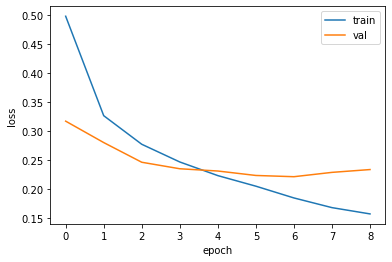

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

375/375 [==============================] - 4s 9ms/step - loss: 0.2217 - accuracy: 0.9211


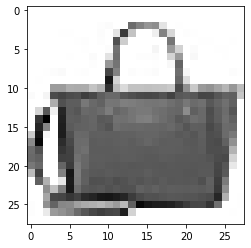

[[6.7413148e-18 6.9123389e-29 3.2865291e-20 2.8991476e-19 3.1119336e-19
  1.5668519e-18 1.7874762e-19 4.3459953e-20 1.0000000e+00 7.0881195e-22]]


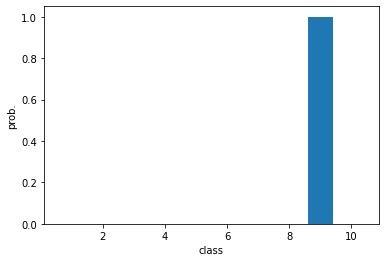

가방
313/313 [==============================] - 3s 10ms/step - loss: 0.2488 - accuracy: 0.9152


[0.24876311421394348, 0.9151999950408936]

In [15]:
model.evaluate(val_scaled, val_target)
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

#실전 기대치
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

--2021-09-11 10:26:11--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2021-09-11 10:26:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4044200 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.3’

best-cnn-model.h5.3 100%[===================>]   3.86M  --.-KB/s    in 0.02s   

2021-09-11 10:26:12 (199 MB/s) - ‘best-cnn-model.h5.3’ saved [4044200/4044200]

(3, 3, 1, 32) (32,

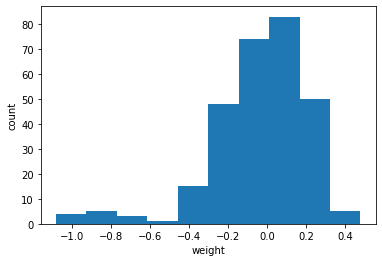

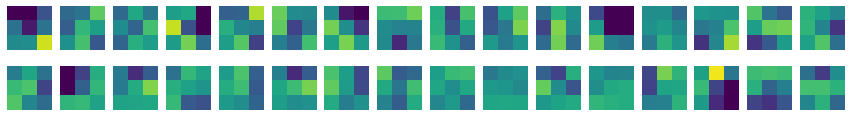

In [12]:
#08-3합성곱 신경망의 최적화
from tensorflow import keras
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
model = keras.models.load_model('best-cnn-model.h5')
model.layers

conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)
conv_weights = conv.weights[0].numpy()
#가중치의 평균과 표준편차
print(conv_weights.mean(), conv_weights.std())

import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

#conv_weights - 가중치값들
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

(3, 3, 1, 32)
-0.00063671794 0.082886025


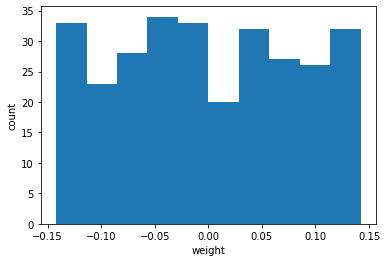

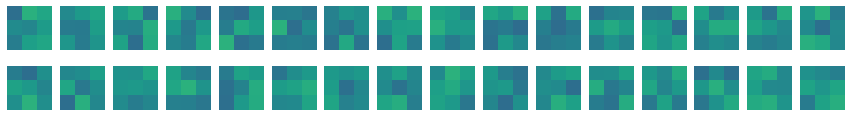

In [18]:
#빈 합성곱
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15,2))
#전보다 밋밋한 가중치다 
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


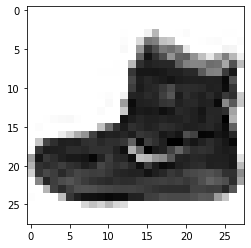

(1, 28, 28, 32)


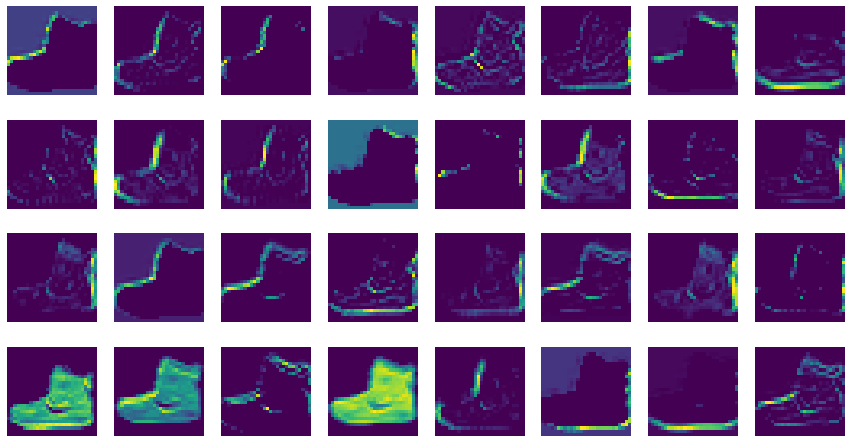

In [21]:
#함수형 api
#첫번째 conv2d의 출력
print(model.input)
conv_acti = keras.Model(model.input, model.layers[0].output)

#특성맵(featuremap) 시각화
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

#predict 메소드는 꼭 첫번째 차원과 같아야 함

inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)


fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

(1, 14, 14, 64)


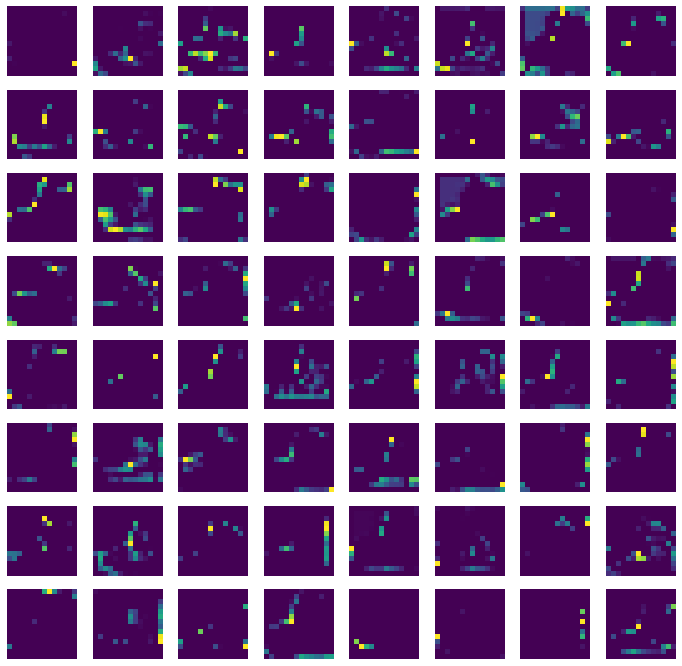

In [22]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
print(feature_maps.shape)
fig, axs = plt.subplots(8, 8, figsize=(12,12))
#그림이 의마하는 바 ?
#뒷쪽 합성곱은 앞에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습하는데 초점을 둔다
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

